In [321]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib

plt.style.use('fivethirtyeight')
matplotlib.rcParams.update({'font.size': 14})
matplotlib.rcParams['image.cmap'] = 'viridis'

In [333]:
st_df = pd.read_pickle('../data/co_trails_df')
st_df.columns
st_df['dist_to_Denver_mi'] = np.round(st_df['dist_to_Denver_mi'], 2)
view_cols = ['id', 'name', 'length', 
             'description', 'lat', 'lon', 'difficulty', 'rating', 'description_length', 'dist_to_Denver_mi']
st_df[view_cols].head()
# st_df.columns

,id,name,length,description,lat,lon,difficulty,rating,description_length,dist_to_Denver_mi
0,4,Bear Creek Regional Park,6.0,This place has some good hills and wide trails...,38.82509,-104.85969,beginner,2.86,339,63.56
1,5,Black Forest Regional Park,4.0,This place doesn't have a whole lot to offer b...,39.01355,-104.73789,beginner,2.44,383,51.93
2,6,Blodgett,3.0,Trail starts as a fireroad and climbs. You can...,38.94890,-104.88610,intermediate,3.27,1050,54.90
3,7,Captain Jack's,5.0,The ride up High Drive is about a mile and com...,38.79908,-104.88353,intermediate,4.29,668,65.23
4,8,Garden of the Gods: Ute Trail,5.0,This is a pretty easy ride and a great one for...,38.87701,-104.87776,beginner,3.24,233,59.89


In [202]:
from math import sin, cos, sqrt, atan2, radians
def calc_distance_to_Denver_km(lat, lon):

    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(39.7392) # Denver
    lon1 = radians(-104.9903)
    lat2 = radians(lat) 
    lon2 = radians(lon)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

In [224]:
st_df['dist_to_Denver_km'] = st_df.apply(lambda x: \
                                         calc_distance_to_Denver_km(np.float(x['lat']), np.float(x['lon'])), axis=1)

st_df['Pump_track'] = st_df['features'].map(lambda x: 'Pump' in x)
st_df['Lift_service'] = st_df['features'].map(lambda x: 'Lift' in x)
st_df['Lift_service'].value_counts()

False    1183
True       28
Name: Lift_service, dtype: int64

In [213]:
# st_df.drop('dist_to_Denver', axis=1, inplace=True)
st_df.columns

Index(['id', 'name', 'url', 'length', 'description', 'directions', 'city',
       'region', 'country', 'lat', 'lon', 'difficulty', 'features', 'rating',
       'thumbnail', 'region_num', 'length_rounded', 'rating_rounded',
       'description_length', 'difficulty_num', 'region_name',
       'dist_to_Denver_km'],
      dtype='object')

In [278]:
st_df[st_df['rating_rounded']>=4].shape

(418, 25)

In [175]:
st_df['length_rounded'] = st_df['length'].apply(lambda x: np.round(float(x), 0))
st_df['length_rounded'].unique()
type(st_df['length_rounded'][0])

numpy.float64

In [176]:
st_df['rating_rounded'] = st_df['rating'].apply(lambda x: np.round(float(x), 1))
st_df['rating_rounded'].unique()

array([2.9, 2.4, 3.3, 4.3, 3.2, 3.9, 3.1, 4.2, 4.4, 3.5, 4.1, 2.8, 3.4,
       4.5, 3.6, 3.8, 4.9, 4.6, 4.8, 2.5, 1. , 4. , 2.6, 3. , 3.7, 0. ,
       1.2, 2. , 1.7, 2.2, 2.3, 2.7, 5. , 4.7, 1.5])

In [177]:
st_df['description_length'] = st_df['description'].apply(lambda x: len(x))
len(st_df[st_df['description_length']<=40]['description'])

25

In [218]:
st_df[st_df['description_length']<=40]['features']

91                                             
327     Restrooms, Fat biking allowed in winter
339                        Night riding allowed
364                        Night riding allowed
548                                            
567                                            
568                                            
569                                            
570                                            
630                                            
636                                   Restrooms
658                                   Restrooms
659                                   Restrooms
665                                            
673                                            
789                        Night riding allowed
819                                            
878                                            
935                     Lift service, Restrooms
945                                  Pump track
946                                  Pum

In [178]:
diff_dict = {'novice': 1,
 'beginner': 2,
 'intermediate': 3,
 'advanced': 4,
 'expert': 5,
 None: 3}
st_df['difficulty_num'] = st_df['difficulty'].map(lambda x: diff_dict[x])
st_df['difficulty_num'].value_counts()

3    761
4    216
2    172
1     46
5     16
Name: difficulty_num, dtype: int64

In [313]:
st_df['dist_to_Denver_mi'] = st_df['dist_to_Denver_km'] * km_to_miles
st_df['dist_to_Denver_mi_bucket'] = st_df['dist_to_Denver_mi'].\
    map(lambda x: '0-25 miles' if x<=25 \
                else '25-50 miles' if x<=50 \
                else '50-100 miles' if x<=100 \
                else '100-200 miles' if x<=200 \
                else '200+ miles')
st_df['dist_to_Denver_mi_bucket'].value_counts()

100-200 miles    423
50-100 miles     391
200+ miles       194
25-50 miles      122
0-25 miles        81
Name: dist_to_Denver_mi_bucket, dtype: int64

In [179]:
view_cols = set(st_df.columns).difference(set(['directions', 'thumbnail','city', 'country', 'features', \
                                               'rating_rounded', 'length_rounded', 'url', 'region_num']))
not_cols = ['directions', 'thumbnail','city', 'country', 'features', \
                                               'rating_rounded', 'length_rounded', 'url']
view_cols2 = ['id', 'name', 'length', 'description', 'region', 'lat', 'lon', 'difficulty',\
              'rating', 'description_length', 'region_num', 'difficulty_num']
st_df[st_df['id']=='3']

,id,name,url,length,description,directions,city,region,country,lat,lon,difficulty,features,rating,thumbnail,region_num,length_rounded,rating_rounded,description_length,difficulty_num
359,3,Apex Park,https://www.singletracks.com/bike-trails/apex-...,8.0,"From the Heritage Square parking lot, take Ape...",From the I-25 and 6th Ave. intersection in Den...,Golden,Colorado,UNITED STATES,39.71646,-105.20924,advanced,Night riding allowed,4.16,https://images.singletracks.com/2014/10/G00579...,1,8.0,4.2,785,4


In [157]:
st_df[st_df['features'].map(lambda x: 'Pump' in x)].count()

id                    19
name                  19
url                   19
length                19
description           19
directions            19
city                  19
region                19
country               19
lat                   19
lon                   19
difficulty            16
features              19
rating                19
thumbnail             19
region_num            19
length_rounded        19
rating_rounded        19
description_length    19
difficulty_num        19
dtype: int64

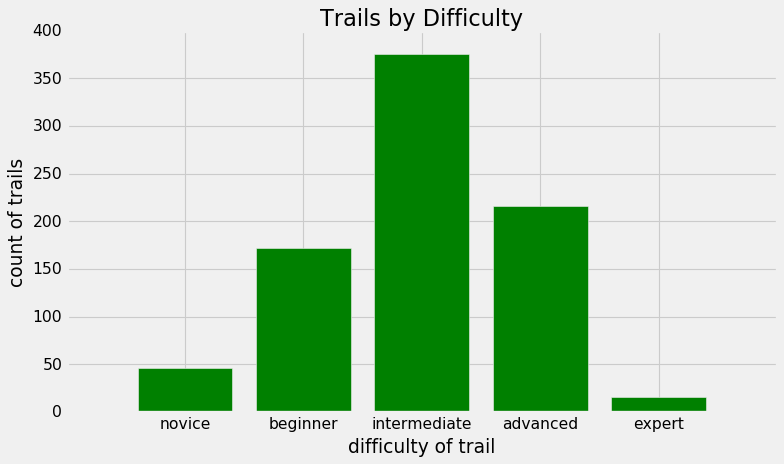

In [343]:
y = st_df[['difficulty', 'id']].groupby(by='difficulty').count().reset_index()
order = np.array(['novice', 'beginner', 'intermediate', 'advanced', 'expert', None])
order_dict = {difficulty:np.argwhere(order==difficulty)[0][0] for difficulty in order}
y['order'] = np.zeros(len(y))
for i, diffy in enumerate(order):
    y.loc[y['difficulty']==diffy, 'order'] = order_dict[diffy]
y = y.sort_values(by='order')
width = 0.8

fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(y.shape[0])
labels = y['difficulty']
ax.bar(x, y['id'], width, color='g', align='center')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel('count of trails')
ax.set_xlabel('difficulty of trail')
ax.set_title('Trails by Difficulty')
fig.tight_layout(pad=1)
fig.savefig('../images/co_Trails_by_difficulty_ordered.png')

In [338]:
order_dict
y


,difficulty,id,order
4,novice,46,0.0
1,beginner,172,1.0
3,intermediate,376,2.0
0,advanced,216,3.0
2,expert,16,4.0


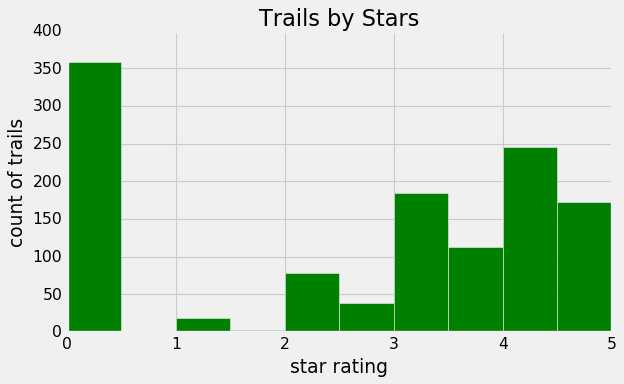

In [349]:
x = np.arange(6)

fig, ax = plt.subplots(figsize=(8, 5))
dummy = np.array([1, 1, 2, 2, 1, 5, 5, 5])
ax.hist(st_df['rating_rounded'].values, color='g')
ax.set_xticks(x)
ax.set_xticklabels(x)
ax.set_ylabel('count of trails')
ax.set_xlabel('star rating')
ax.set_title('Trails by Stars')

fig.tight_layout(pad=1)
fig.savefig('../images/co_Trails_by_stars.png')

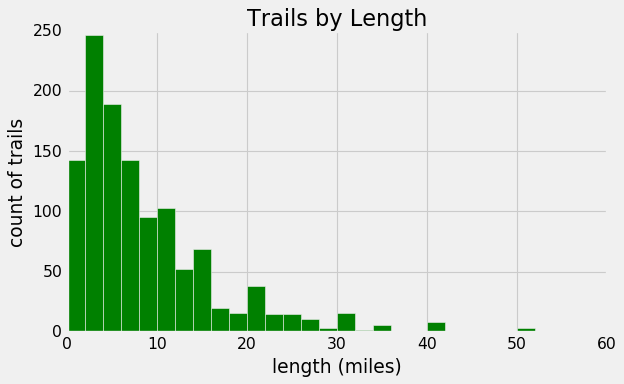

In [324]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(st_df['length_rounded'][st_df['length_rounded']<=60], bins=29, color='g')
ax.set_xlim(0, 60)
ax.set_ylabel('count of trails')
ax.set_xlabel('length (miles)')
ax.set_title('Trails by Length')

fig.tight_layout(pad=1)
fig.savefig('../images/co_trails_by_length.png')
# st_df['length_rounded'].max()

top words hist ... word cloud...  stop words
PCA chart? clusters?
n-grams
stop words
CV vs TF-IDF

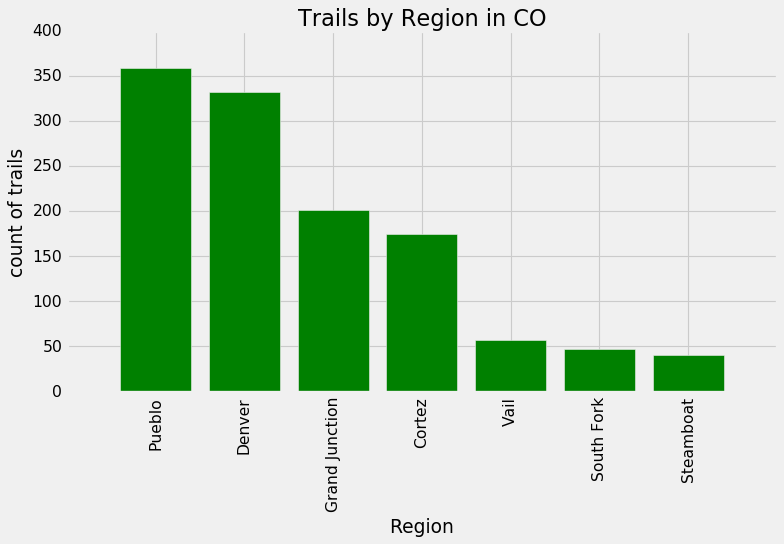

In [351]:
region_dict = {0: "Pueblo", 1: 'Denver', 2: 'Grand Junction', 3: 'Cortez', 4: "Vail", 5: "South Fork", 6: 'Steamboat'}

fig, ax = plt.subplots(figsize=(10, 7))
y = st_df['region_num'].value_counts()
x = np.arange(len(y))

labels = []
for i in x:
    labels.append(region_dict[i])

ax.bar(x, y, color='g', align='center')
plt.xticks(x, labels, rotation='vertical')
#ax.set_xticks(x)
#ax.set_xticklabels(labels)
ax.set_ylabel('count of trails')
ax.set_xlabel('Region')
ax.set_title('Trails by Region in CO')

fig.tight_layout(pad=1)
fig.savefig('../images/co_trails_by_region.png')

In [180]:
st_df['region_name'] = st_df['region_num'].map(lambda x: region_dict[x])
st_df['region_name'].unique()

array(['Pueblo', 'Denver', 'Grand Junction', 'Cortez', 'Vail',
       'South Fork', 'Steamboat'], dtype=object)

In [221]:
st_df[st_df['features'].map(lambda x: 'Lift' in x)]['features']

366               Drinking water, Lift service, Restrooms
369         Lift service, Night riding allowed, Restrooms
381                                          Lift service
435               Drinking water, Lift service, Restrooms
492               Drinking water, Lift service, Restrooms
577                               Lift service, Restrooms
583               Drinking water, Lift service, Restrooms
623               Drinking water, Lift service, Restrooms
631               Drinking water, Lift service, Restrooms
632               Drinking water, Lift service, Restrooms
690               Drinking water, Lift service, Restrooms
853                               Lift service, Restrooms
869               Drinking water, Lift service, Restrooms
870               Drinking water, Lift service, Restrooms
876                                          Lift service
927                                          Lift service
934                               Lift service, Restrooms
935           

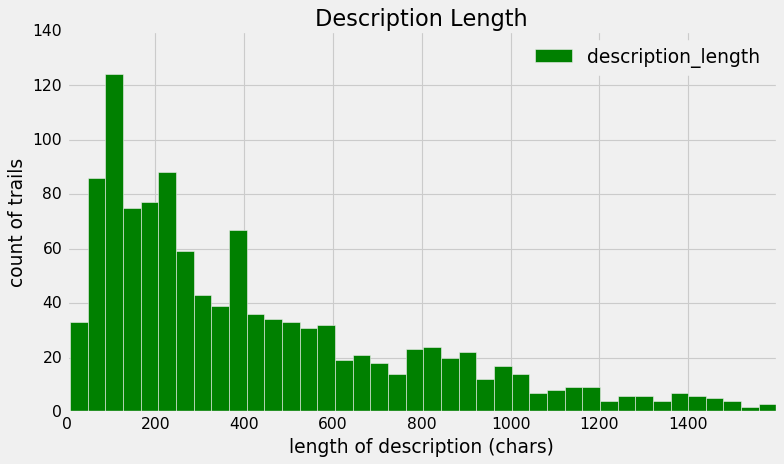

In [352]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(st_df['description_length'][st_df['description_length']<=1600], bins=40, color='g')
# avg = round(st_df['description_length'].mean())
# ax.axvline(x=avg, linestyle='--', linewidth=2, label=f'Mean length: {avg} chars')
ax.set_xlim(0, 1600)
ax.set_xticks(np.arange(0, 1600, 200))
ax.set_ylabel('count of trails')
ax.set_xlabel('length of description (chars)')
ax.set_title('Description Length')
ax.legend()

fig.tight_layout(pad=1)
fig.savefig('../images/co_description_length.png')

In [314]:
st_df.to_pickle('../data/co_trails_df')
st_df.columns

Index(['id', 'name', 'url', 'length', 'description', 'directions', 'city',
       'region', 'country', 'lat', 'lon', 'difficulty', 'features', 'rating',
       'thumbnail', 'region_num', 'length_rounded', 'rating_rounded',
       'description_length', 'difficulty_num', 'region_name',
       'dist_to_Denver_km', 'Pump_track', 'Lift_service', 'dist_to_Denver_mi',
       'dist_to_Denver_mi_bucket'],
      dtype='object')

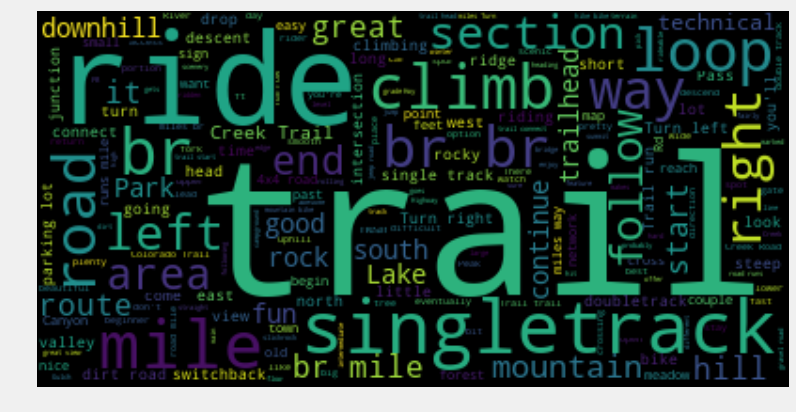

In [63]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from gensim.parsing.preprocessing import STOPWORDS
from nltk.corpus import stopwords

nltk_stopwords = set(stopwords.words('english'))
gensim_stopwords = STOPWORDS
# my_stopwords = set(['trail', 'trails', 'loop','br', \
#                     'mile', 'miles','ride', 'area', 'route', 'way', \
#                     'feature', 'section', 'ride', 'riding'\
#                     'north', 'south', 'east', 'west', 'right', 'left'])
# all_stopwords = my_stopwords.union(nltk_stopwords.union(gensim_stopwords))

text = ''
for desc in st_df[st_df['description_length']>=40]['description']:
    text += desc
wordcloud = WordCloud(stopwords=STOPWORDS).generate(text)

fig, ax = plt.subplots(figsize=(12, 8))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis('off');

In [64]:
wordcloud.to_file("../images/co_wordcloud1.png")

In [65]:
# run st_nlp.py

In [145]:
diff_color_dict = {'novice': 'limegreen', 'beginner': 'deepskyblue', \
                                              'intermediate':'mediumblue', 'advanced':'black', \
                                              'expert':'black', None:'white'}



In [146]:
y = st_df_with_desc['difficulty'].map(diff_color_dict)
diff_color_dict
y.value_counts()

NameError: name 'st_df_with_desc' is not defined

In [67]:
# from matplotlib.lines import Line2D

# legend_elements2 = []
# for difficulty, color in diff_dict.items():
#     line = Line2D([0], [0], marker='o', color='w', label=difficulty,
#                           markerfacecolor=color, markersize=10)
#     legend_elements2.append(line)

# fig, ax = plt.subplots(1, 1, figsize=(10, 8))
# ax.scatter(pca_tfidf[:, 0], pca_tfidf[:, 1], c=y)
# ax.set_title("PCA Components: colored by trail difficulty")
# ax.set_xlabel("1st eigenvector (PC1)")
# ax.set_ylabel("2nd eigenvector (PC2)")
# ax.legend(handles=legend_elements2, facecolor='w', title='Trail difficulty')

# # fig.savefig('../images/st_PCA_difficulty.png');

In [68]:
# colors = ['red', 'orange', 'yellow', 'limegreen', 'blue', 'purple', 'black', 'white', 'cyan', 'pink', 'peru']
# state_dict = {state: colors[ind%11] for ind, state in enumerate(st_df_with_desc['region'].unique())}
# y2 = st_df_with_desc['region'].map(state_dict)
# state_dict

In [69]:
# legend_elements2 = []
# for state, color in state_dict.items():
#     line = Line2D([0], [0], marker='o', color='w', label=state,
#                           markerfacecolor=color, markersize=10)
#     legend_elements2.append(line)

# fig, ax = plt.subplots(1, 1, figsize=(10, 8))
# ax.scatter(pca_tfidf[:, 0], pca_tfidf[:, 1], c=y2)
# ax.set_title("PCA Components: colored by State")
# ax.set_xlabel("1st eigenvector (PC1)")
# ax.set_ylabel("2nd eigenvector (PC2)")
# ax.legend(handles=legend_elements2, facecolor='w', title='State')

# # fig.savefig('../images/st_PCA_region.png');

In [328]:
W_df = pd.read_pickle('../models/co_W_df')
W_df.head()

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
id,,,,,,,,,,
4,0.039817,0.002935,0.005698,0.005165,0.000044,0.005900,0.001744,0.000000,0.000000,0.000000
5,0.052992,0.000000,0.000000,0.008103,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.085306,0.000000,0.005952,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000006
7,0.082955,0.000000,0.013885,0.000000,0.002667,0.007284,0.000000,0.004326,0.009196,0.000000
8,0.055309,0.000000,0.000000,0.007349,0.002848,0.000000,0.001590,0.000000,0.000000,0.000000


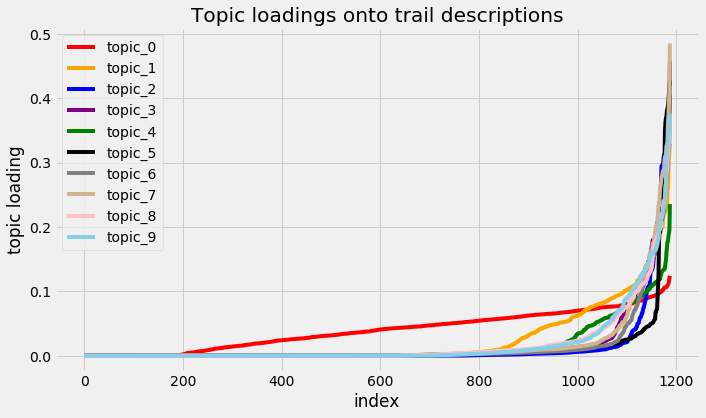

In [131]:
colors = ['red', 'orange', 'blue', 'purple', 'green', 'black', 'gray', 'tan', 'pink', 'skyblue', 'lightgreen', 'cyan']
fig, ax = plt.subplots(figsize=(10, 6))
for i, topic in enumerate(W_df):
    ax.plot(np.sort(W_df[topic].values), label=topic, color=colors[i%12])
ax.set_title('Topic loadings onto trail descriptions')
ax.set_ylabel('topic loading')
ax.set_xlabel('index')
ax.legend(loc='upper left')
fig.tight_layout(pad=1)
fig.savefig('../images/topic_loadings_plot.png');

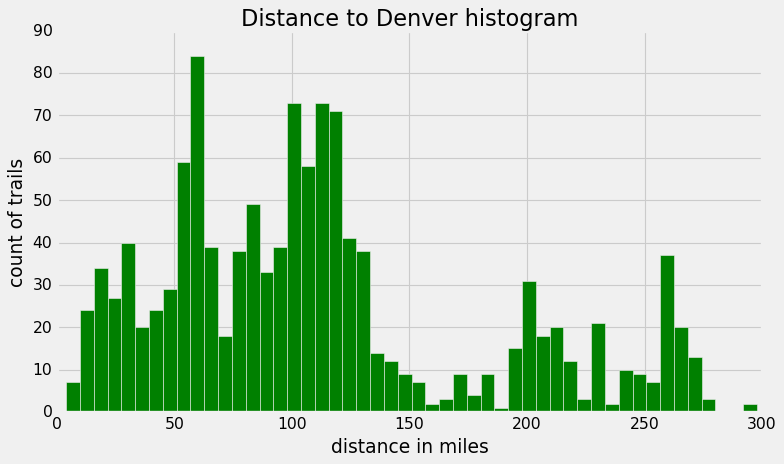

In [326]:
km_to_miles = 0.621371

fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(st_df['dist_to_Denver_mi'], bins=50, color='g')
ax.set_title('Distance to Denver histogram')
ax.set_xlabel('distance in miles')
ax.set_ylabel('count of trails')
fig.tight_layout(pad=1)
fig.savefig('../images/dist_to_denver.png');

In [231]:
st_df['length_rounded'].max()

535.0

In [232]:
mtb_df = pd.read_pickle('../data/mtb_trails_df')

In [263]:
st_df['description_short'] = st_df['description'].map(lambda x: x[:12])

In [269]:
list(st_df.sort_values(by='rating', ascending=False)['id'][:10]

1210    12253
994      7283
912      4225
914      4412
916      4650
279     10768
929      5751
931      7681
933      8701
936      8804
Name: id, dtype: object